# Azure sentiment analysis on Kaggle Comments

In [1]:
import requests
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## API

In [2]:
subscription_key="a19418d2cd5848878622ccaacaaedca5"
assert subscription_key

In [3]:
text_analytics_base_url =\
"https://westcentralus.api.cognitive.microsoft.com/text/analytics/v2.0/"

In [4]:
documents = {"documents":[]}
path = "/Users/Xuhuiz2/Desktop/Forum_Message.txt"
doc1 = open(path, "r")
output = doc1.readlines()
count = 0
for line in output:
    count +=1
    record = {"id": count, "language": "en", "text": line}
    documents["documents"].append(record)

#print it out
documents

{'documents': [{'id': 1,
   'language': 'en',
   'text': 'Id,ForumTopicId,AuthorUserId,Message,ReplyToForumMessageId\n'},
  {'id': 2,
   'language': 'en',
   'text': '198,1,1902,"Training and test data are clearly hand-picked and/or biased somehow. It\'s like a ""trick question"" in a quiz. I can see how that makes a contest more challenging, but if the purpose is to produce useful results, this just hinders the task at hand.",\n'},
  {'id': 3,
   'language': 'en',
   'text': '205,1,728,"Well, it\'s unfortunate that the contest turned out this way, but I *really* hope that when the contest is over, the top people on the leaderboard (Rajstennaj, Flying Pig, sayani) will find some way to test their algorithms in a way that\'s more comparable with the other literature on the subject.  For example, cross-validation on the whole set.&nbsp;<div><br></div><div>Hopefully those results could be posted or at least linked to on Kaggle -- I\'m very curious how much of the increase in MCE here is m

In [5]:
sentiment_api_url = text_analytics_base_url + "sentiment"
headers   = {"Ocp-Apim-Subscription-Key": subscription_key}
response  = requests.post(sentiment_api_url, headers=headers, json=documents)
sentiments = response.json()
sentiments

{'documents': [{'id': '1', 'score': 0.5},
  {'id': '2', 'score': 0.8673501014709473},
  {'id': '3', 'score': 0.9308878183364868},
  {'id': '4', 'score': 0.7605401277542114},
  {'id': '5', 'score': 0.8338167667388916},
  {'id': '6', 'score': 0.061196357011795044},
  {'id': '7', 'score': 0.9154579639434814},
  {'id': '8', 'score': 0.27769386768341064},
  {'id': '9', 'score': 0.8172518610954285},
  {'id': '10', 'score': 0.5},
  {'id': '11', 'score': 0.059922635555267334},
  {'id': '12', 'score': 0.5},
  {'id': '13', 'score': 0.8094174265861511},
  {'id': '14', 'score': 0.10792461037635803},
  {'id': '15', 'score': 0.19035950303077698},
  {'id': '16', 'score': 0.1006675660610199},
  {'id': '17', 'score': 0.5},
  {'id': '18', 'score': 0.9203564524650574},
  {'id': '19', 'score': 0.8654382228851318},
  {'id': '20', 'score': 0.8911101818084717},
  {'id': '21', 'score': 0.7947289943695068},
  {'id': '22', 'score': 0.5},
  {'id': '23', 'score': 0.2371177077293396},
  {'id': '24', 'score': 0.799

In [6]:
df = pd.DataFrame(sentiments['documents'])

In [7]:
df.head()
df.describe()

,score
count,566.000000
mean,0.578269
std,0.237262
min,0.030177
25%,0.500000
50%,0.500000
75%,0.786739
max,0.988436


Text(0.5,1,'Density Plot of Sentiment Analysis for Commends on Kaggles via Azure NLP ')

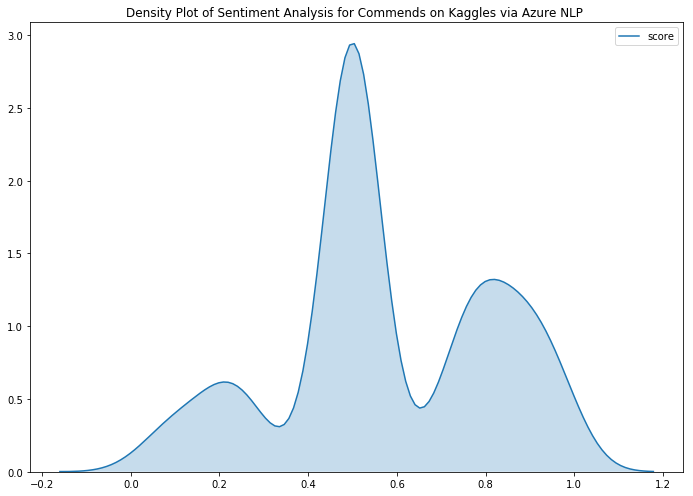

In [8]:
fig, ax = plt.subplots()
sns.kdeplot(df['score'], shade=True, ax=ax)
fig.set_size_inches(11.7, 8.27)
ax.set_title("Density Plot of Sentiment Analysis for Commends on Kaggles via Azure NLP ")

# AWS Comprehend text analysis on Kaggle Comments

In [9]:
import pandas as pd
import boto3
import json

In [10]:
comprehend = boto3.client(service_name='comprehend')

In [11]:
path = "/Users/Xuhuiz2/Desktop/Forum_Message.txt"
doc1 = open(path, "r")
output = doc1.readlines()

In [12]:
output[2]

'205,1,728,"Well, it\'s unfortunate that the contest turned out this way, but I *really* hope that when the contest is over, the top people on the leaderboard (Rajstennaj, Flying Pig, sayani) will find some way to test their algorithms in a way that\'s more comparable with the other literature on the subject.  For example, cross-validation on the whole set.&nbsp;<div><br></div><div>Hopefully those results could be posted or at least linked to on Kaggle -- I\'m very curious how much of the increase in MCE here is merely an artifact and how much is a genuine advance in the field.  Rajstennaj\'s MCE in particular would be astonishing if anywhere close to accurate.</div>",\n'

In [13]:
print(json.dumps(comprehend.detect_sentiment(Text=output[2], LanguageCode='en'), sort_keys=True, indent=4))

{
    "ResponseMetadata": {
        "HTTPHeaders": {
            "connection": "keep-alive",
            "content-length": "162",
            "content-type": "application/x-amz-json-1.1",
            "date": "Thu, 08 Mar 2018 06:07:57 GMT",
            "x-amzn-requestid": "0c0f85c7-2297-11e8-9d52-a71b4437c023"
        },
        "HTTPStatusCode": 200,
        "RequestId": "0c0f85c7-2297-11e8-9d52-a71b4437c023",
        "RetryAttempts": 0
    },
    "Sentiment": "NEUTRAL",
    "SentimentScore": {
        "Mixed": 0.08105029910802841,
        "Negative": 0.037983253598213196,
        "Neutral": 0.7332050204277039,
        "Positive": 0.14776141941547394
    }
}
